In [41]:
%run DMD_functions.ipynb

In [42]:
x = np.array([0.2,0.8]).reshape(-1,1)
x=np.array([1,1]).reshape(-1,1)
A = np.diag([1, 0.5])
m=3
X = np.empty((x.shape[0], m))
Y = np.empty((x.shape[0], m))
X[:,0] = x.reshape(-1)
for i in range(m):
    Y[:,i] = A@X[:,i]
    if(i<m-1):
        X[:,i+1] = Y[:,i]
X, Y


(array([[1.  , 1.  , 1.  ],
        [1.  , 0.5 , 0.25]]),
 array([[1.   , 1.   , 1.   ],
        [0.5  , 0.25 , 0.125]]))

[[ 5.17617911e-01 -1.78748391e-02 -7.18695112e-03]
 [ 2.03887520e-04  9.95820665e-01  1.48807763e-03]
 [ 5.20627952e-01 -7.15372447e-02 -9.28041591e-01]
 [ 4.35560454e-01 -1.50411585e-02 -6.04761084e-03]
 [ 5.20869737e-01 -5.17482243e-02  3.72355161e-01]]
[0.99709517 0.4993943  0.25865354]
[0.00277373 0.01650717 0.0098288 ]
[0.99709517 0.4993943  0.25865354]
K = X*^+ Y*
[[ 0.29160148  0.00990379  0.25511038  0.24537418  0.309116  ]
 [ 0.01980758  0.49933242  0.01240147  0.0166675   0.01973725]
 [ 0.14563708 -0.00490843  0.34118297  0.12254938  0.05239454]
 [ 0.24537418  0.00833375  0.21466798  0.20647525  0.26011215]
 [ 0.3532125  -0.01190438  0.22114535  0.29721807  0.41655089]]


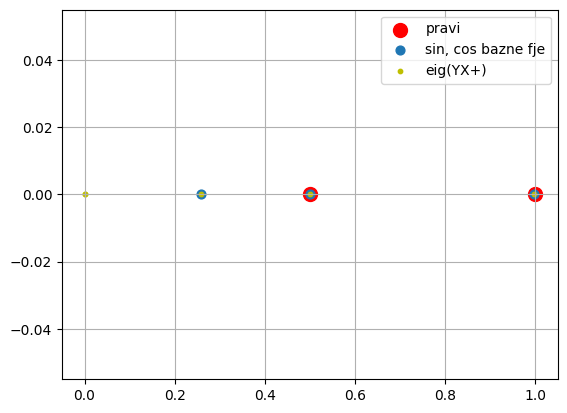

In [43]:
X2 = np.array([X[0,:], X[1,:],X[0,:]**2+X[1,:]**2,np.sin(X[0,:]), np.cos(X[1,:])]) #x1, x2, sin(x1), cos(x2)
Y2 = np.array([Y[0,:], Y[1,:],Y[0,:]**2+Y[1,:]**2, np.sin(Y[0,:]), np.cos(Y[1,:])])
X2, Y2

Z2, L2, r2 = GEDMDQ_multiple_trajectories(X2, Y2, tol=1e-12) #isto za 1e-6
print(Z2, L2, r2, sep="\n")


print(L2)

K=np.linalg.pinv(X2.conj().T)@Y2.conj().T
print("K = X*^+ Y*", K, sep="\n") 
mu, vec = np.linalg.eig(K)
mu, vec

scatter2=plt.scatter([1, 0.5], [0,0], c="r", s=100)
scatter2.set_label("pravi")
scatter1=plt.scatter(np.real(L2), np.imag(L2), s=40)
scatter1.set_label("sin, cos bazne fje")
scatter3=plt.scatter(np.real(mu), np.imag(mu), c="y", label="eig(YX+)", s=10)

plt.legend()
plt.grid()

[[ 6.08290588e-01 -1.01612107e-15 -9.79336230e-16]
 [-3.95429457e-16  9.98210515e-01  7.07497806e-15]
 [ 5.11858881e-01 -5.31436864e-16 -5.95021972e-16]
 [ 6.06616062e-01  5.97977172e-02  1.00000000e+00]]
[1.         0.5        0.28947881]
[8.09170075e-16 6.32200362e-16 8.03555737e-16]
[1.         0.5        0.28947881]
K = X*^+ Y*
[[ 5.85454928e-01  1.99840144e-15  4.92643335e-01  4.14833011e-01]
 [-1.77635684e-15  5.00000000e-01 -1.60543557e-15  1.26112543e-02]
 [ 4.92643335e-01  8.88178420e-16  4.14545072e-01  3.49069942e-01]
 [-5.32907052e-15 -1.99840144e-15 -4.24582125e-15  2.89478809e-01]]


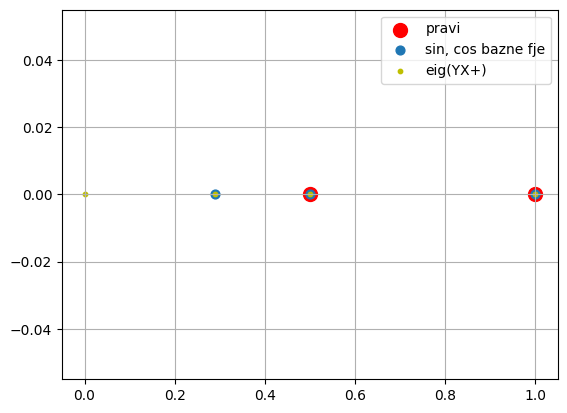

In [44]:
X2 = np.array([X[0,:], X[1,:],np.sin(X[0,:]), np.cos(X[1,:])]) #x1, x2, sin(x1), cos(x2)
Y2 = np.array([Y[0,:], Y[1,:],np.sin(Y[0,:]), np.cos(Y[1,:])])
X2, Y2

Z2, L2, r2 = GEDMDQ_multiple_trajectories(X2, Y2, tol=1e-12) #isto za 1e-6
print(Z2, L2, r2, sep="\n")


print(L2)

K=np.linalg.pinv(X2.conj().T)@Y2.conj().T
print("K = X*^+ Y*", K, sep="\n") 
mu, vec = np.linalg.eig(K)
mu, vec

scatter2=plt.scatter([1, 0.5], [0,0], c="r", s=100)
scatter2.set_label("pravi")
scatter1=plt.scatter(np.real(L2), np.imag(L2), s=40)
scatter1.set_label("sin, cos bazne fje")
scatter3=plt.scatter(np.real(mu), np.imag(mu), c="y", label="eig(YX+)", s=10)

plt.legend()
plt.grid()

[[7.08080726e-01 1.74436784e-14 2.04122620e-14]
 [6.44714322e-16 9.98210515e-01 5.98372243e-15]
 [7.06131493e-01 5.97977172e-02 1.00000000e+00]]
[1.         0.5        0.28947881]
[2.48641009e-16 4.34443477e-16 8.32667268e-17]
[1.         0.5        0.28947881]
K = X*^+ Y*
[[ 1.00000000e+00 -2.22044605e-15  7.08565239e-01]
 [ 3.55271368e-15  5.00000000e-01  1.26112543e-02]
 [ 1.77635684e-15  1.33226763e-15  2.89478809e-01]]


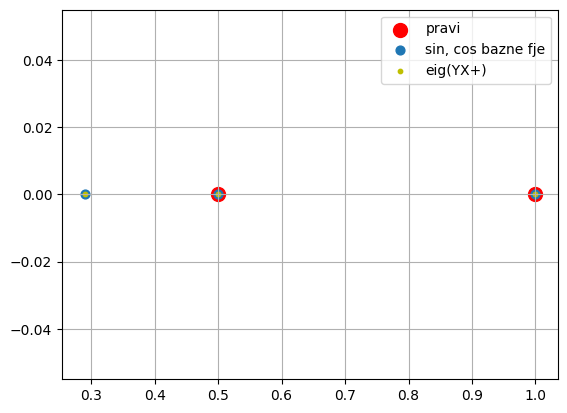

In [45]:
X2 = np.array([X[0,:], X[1,:], np.cos(X[1,:])]) #x1, x2, cos(x2)
Y2 = np.array([Y[0,:], Y[1,:], np.cos(Y[1,:])])
X2, Y2

Z2, L2, r2 = GEDMDQ_multiple_trajectories(X2, Y2, tol=1e-12) #isto za 1e-6
print(Z2, L2, r2, sep="\n")


print(L2)

K=np.linalg.pinv(X2.conj().T)@Y2.conj().T
print("K = X*^+ Y*", K, sep="\n") 
mu, vec = np.linalg.eig(K)
mu, vec

scatter2=plt.scatter([1, 0.5], [0,0], c="r", s=100)
scatter2.set_label("pravi")
scatter1=plt.scatter(np.real(L2), np.imag(L2), s=40)
scatter1.set_label("sin, cos bazne fje")
scatter3=plt.scatter(np.real(mu), np.imag(mu), c="y", label="eig(YX+)", s=10)

plt.legend()
plt.grid()

[[ 7.06566775e-01 -5.17521194e-15]
 [ 7.07646376e-01  1.00000000e+00]]
[1.         0.26850639]
[9.03656072e-16 8.77708367e-17]
[1.         0.26850639]
K = X*^+ Y*
[[ 1.00000000e+00  7.32751070e-01]
 [-2.22044605e-16  2.68325862e-01]]


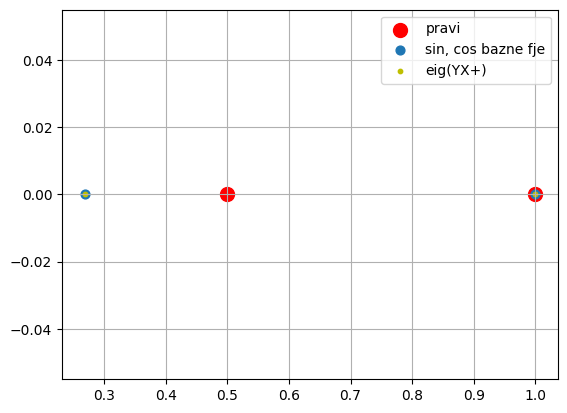

In [46]:
X2 = np.array([X[0,:], np.cos(X[1,:])]) #x1, x2, sin(x1), cos(x2)
Y2 = np.array([Y[0,:], np.cos(Y[1,:])])
X2, Y2

Z2, L2, r2 = GEDMDQ_multiple_trajectories(X2, Y2, tol=1e-12) #isto za 1e-6
print(Z2, L2, r2, sep="\n")


print(L2)

K=np.linalg.pinv(X2.conj().T)@Y2.conj().T
print("K = X*^+ Y*", K, sep="\n") 
mu, vec = np.linalg.eig(K)
mu, vec

scatter2=plt.scatter([1, 0.5], [0,0], c="r", s=100)
scatter2.set_label("pravi")
scatter1=plt.scatter(np.real(L2), np.imag(L2), s=40)
scatter1.set_label("sin, cos bazne fje")
scatter3=plt.scatter(np.real(mu), np.imag(mu), c="y", label="eig(YX+)", s=10)

plt.legend()
plt.grid()

[[1.00000000e+00 1.38282196e-15]
 [4.26642159e-17 1.00000000e+00]]
[1.  0.5]
[2.48253415e-16 1.66533454e-16]
[1.  0.5]
K = X*^+ Y*
[[1.0000000e+00 6.9388939e-17]
 [0.0000000e+00 5.0000000e-01]]


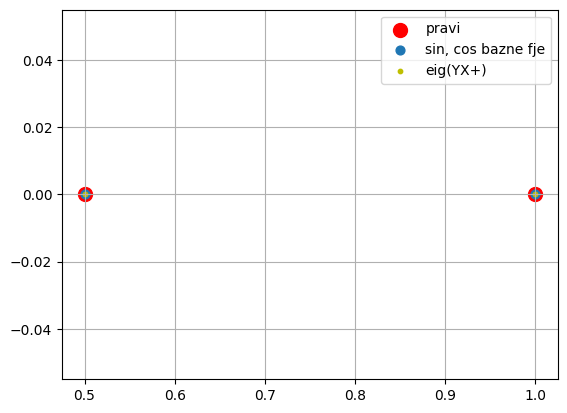

In [47]:
X2 = np.array([X[0,:], X[1,:]]) #x1, x2, sin(x1), cos(x2)
Y2 = np.array([Y[0,:], Y[1,:]])
X2, Y2

Z2, L2, r2 = GEDMDQ_multiple_trajectories(X2, Y2, tol=1e-12) #isto za 1e-6
print(Z2, L2, r2, sep="\n")


print(L2)

K=np.linalg.pinv(X2.conj().T)@Y2.conj().T
print("K = X*^+ Y*", K, sep="\n") 
mu, vec = np.linalg.eig(K)
mu, vec

scatter2=plt.scatter([1, 0.5], [0,0], c="r", s=100)
scatter2.set_label("pravi")
scatter1=plt.scatter(np.real(L2), np.imag(L2), s=40)
scatter1.set_label("sin, cos bazne fje")
scatter3=plt.scatter(np.real(mu), np.imag(mu), c="y", label="eig(YX+)", s=10)

plt.legend()
plt.grid()

[[ 7.07106781e-01  8.49599617e-14 -4.56022198e-14]
 [-5.82382087e-15  1.00000000e+00  5.81494300e-14]
 [ 7.07106781e-01  1.43895123e-13  1.00000000e+00]]
[1.   0.5  0.25]
[3.34221389e-16 5.88784672e-16 9.30950307e-17]
[1.   0.5  0.25]
K = X*^+ Y*
[[ 1.00000000e+00  2.22044605e-16  7.50000000e-01]
 [ 8.88178420e-16  5.00000000e-01  1.83186799e-15]
 [-8.88178420e-16 -1.11022302e-16  2.50000000e-01]]


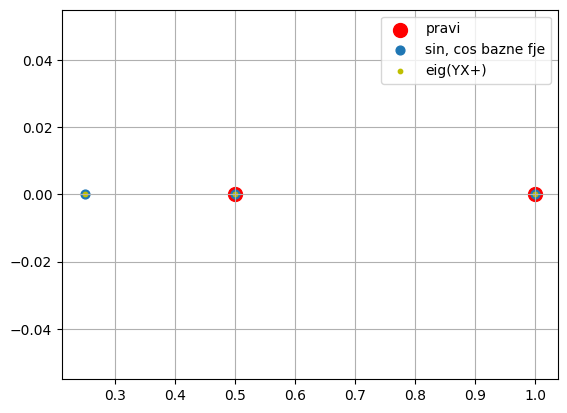

In [ ]:
X2 = np.array([X[0,:], X[1,:],X[0,:]**2+X[1,:]**2]) #x1, x2, x1^2+x2^2
Y2 = np.array([Y[0,:], Y[1,:],Y[0,:]**2+Y[1,:]**2])
X2, Y2

Z2, L2, r2 = GEDMDQ_multiple_trajectories(X2, Y2, tol=1e-12) #isto za 1e-6
print(Z2, L2, r2, sep="\n")


print(L2)

K=np.linalg.pinv(X2.conj().T)@Y2.conj().T
print("K = X*^+ Y*", K, sep="\n") 
mu, vec = np.linalg.eig(K)
mu, vec

scatter2=plt.scatter([1, 0.5], [0,0], c="r", s=100)
scatter2.set_label("pravi")
scatter1=plt.scatter(np.real(L2), np.imag(L2), s=40)
scatter1.set_label("sin, cos bazne fje")
scatter3=plt.scatter(np.real(mu), np.imag(mu), c="y", label="eig(YX+)", s=10)

plt.legend()
plt.grid()

[[-7.07106781e-01 -1.22642149e-15]
 [ 2.07517092e-16  7.07106781e-01]
 [-7.07106781e-01  7.07106781e-01]]
[1.  0.5]
[2.60003165e-16 1.40250006e-16]
[1.  0.5]
K = X*^+ Y*
[[ 6.66666667e-01 -1.66666667e-01  5.00000000e-01]
 [-3.33333333e-01  3.33333333e-01  2.22044605e-16]
 [ 3.33333333e-01  1.66666667e-01  5.00000000e-01]]


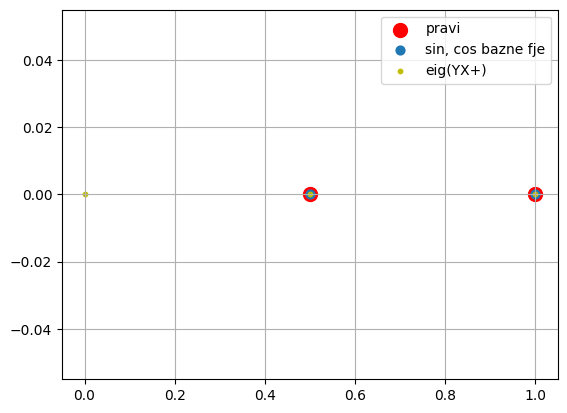

In [49]:
X2 = np.array([X[0,:], X[1,:],X[0,:]+X[1,:]]) #x1, x2, sin(x1), cos(x2)
Y2 = np.array([Y[0,:], Y[1,:],Y[0,:]+Y[1,:]])
X2, Y2

Z2, L2, r2 = GEDMDQ_multiple_trajectories(X2, Y2, tol=1e-12) #isto za 1e-6
print(Z2, L2, r2, sep="\n")


print(L2)

K=np.linalg.pinv(X2.conj().T)@Y2.conj().T
print("K = X*^+ Y*", K, sep="\n") 
mu, vec = np.linalg.eig(K)
mu, vec

scatter2=plt.scatter([1, 0.5], [0,0], c="r", s=100)
scatter2.set_label("pravi")
scatter1=plt.scatter(np.real(L2), np.imag(L2), s=40)
scatter1.set_label("sin, cos bazne fje")
scatter3=plt.scatter(np.real(mu), np.imag(mu), c="y", label="eig(YX+)", s=10)

plt.legend()
plt.grid()

[[ 1.00000000e+00  6.24714256e-16]
 [-6.83580866e-17  1.00000000e+00]]
[1.   0.25]
[2.22044605e-16 6.20633538e-17]
[1.   0.25]
K = X*^+ Y*
[[ 1.00000000e+00 -1.90819582e-17]
 [ 1.11022302e-16  2.50000000e-01]]


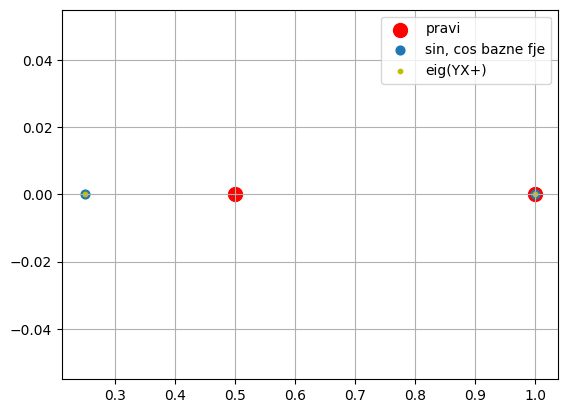

In [50]:
X2 = np.array([X[0,:]**2, X[1,:]**2]) #x1**2, x2**2
Y2 = np.array([Y[0,:]**2, Y[1,:]**2])
X2, Y2

Z2, L2, r2 = GEDMDQ_multiple_trajectories(X2, Y2, tol=1e-12) #isto za 1e-6
print(Z2, L2, r2, sep="\n")


print(L2)

K=np.linalg.pinv(X2.conj().T)@Y2.conj().T
print("K = X*^+ Y*", K, sep="\n") 
mu, vec = np.linalg.eig(K)
mu, vec

scatter2=plt.scatter([1, 0.5], [0,0], c="r", s=100)
scatter2.set_label("pravi")
scatter1=plt.scatter(np.real(L2), np.imag(L2), s=40)
scatter1.set_label("sin, cos bazne fje")
scatter3=plt.scatter(np.real(mu), np.imag(mu), c="y", label="eig(YX+)", s=10)

plt.legend()
plt.grid()

### Novo  

fje $x_1, x_2, x_1^3+x_2^3$ 

-- očekujemo da točno pogodi $0.125, 0.5, 1$ - to i dobijemo

[[ 7.07106781e-01 -3.80084605e-15  7.38459012e-16]
 [ 6.45786655e-17  1.00000000e+00  1.00165892e-16]
 [ 7.07106781e-01 -4.25798838e-15  1.00000000e+00]]
[1.    0.5   0.125]
[1.14439170e-15 4.37975596e-16 7.58342061e-16]
[1.    0.5   0.125]


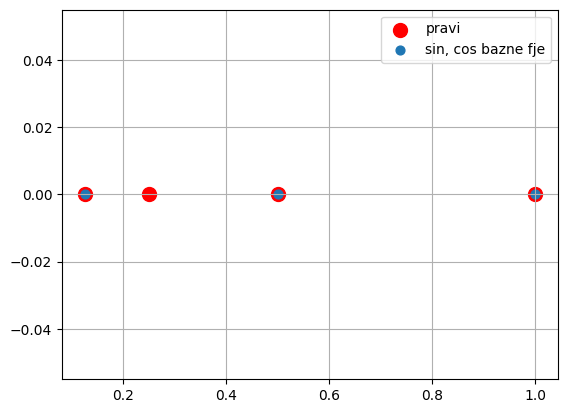

: 

In [ ]:
X2 = np.array([X[0,:], X[1,:],X[0,:]**3+X[1,:]**3]) #x1, x2, x1^3+x2^3
Y2 = np.array([Y[0,:], Y[1,:],Y[0,:]**3+Y[1,:]**3])
X2, Y2

Z2, L2, r2 = GEDMDQ_multiple_trajectories(X2, Y2, tol=1e-12) #isto za 1e-6
print(Z2, L2, r2, sep="\n")


print(L2)


scatter2=plt.scatter([1, 0.5, 0.25, 0.125], [0,0, 0, 0], c="r", s=100)
scatter2.set_label("pravi")
scatter1=plt.scatter(np.real(L2), np.imag(L2), s=40)
scatter1.set_label("sin, cos bazne fje")

plt.legend()
plt.grid()

[[-0.11502729 -0.05549025]
 [-0.18688962 -0.52382874]
 [ 0.10070239 -0.73202877]
 [-0.11491555 -0.05439895]
 [-0.96358416  0.42860113]]
[0.94705845 0.46319455]
[0.09601801 0.10608589]
[0.94705845 0.46319455]
K = X*^+ Y*
[[ 0.01967422  0.05390796  0.02585941  0.01960084  0.12234618]
 [ 0.07187728  0.26766425  0.17216992  0.07146466  0.26339024]
 [ 0.05461708  0.2769454   0.21164012  0.05415321  0.00918695]
 [ 0.01955963  0.05342482  0.02552294  0.01948702  0.12207278]
 [ 0.08258542  0.08059383 -0.05151913  0.08257514  0.89178739]]


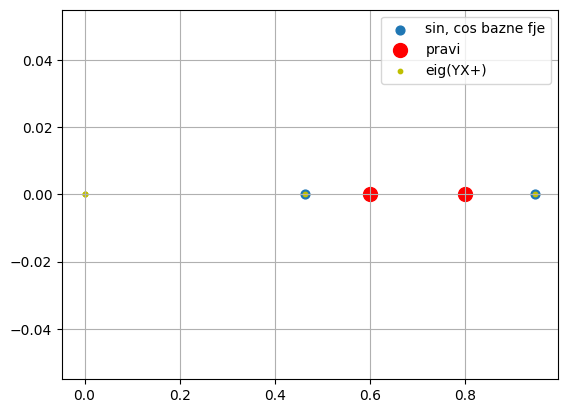

In [39]:
x = np.array([0.2,0.8]).reshape(-1,1)
A = np.diag([0.8, 0.6])
m=2
X = np.empty((x.shape[0], m))
Y = np.empty((x.shape[0], m))
X[:,0] = x.reshape(-1)
for i in range(m):
    Y[:,i] = A@X[:,i]
    if(i<m-1):
        X[:,i+1] = Y[:,i]
X, Y


X2 = np.array([X[0,:], X[1,:],X[0,:]**2+X[1,:]**2,np.sin(X[0,:]), np.cos(X[1,:])]) #x1, x2, sin(x1), cos(x2)
Y2 = np.array([Y[0,:], Y[1,:],Y[0,:]**2+Y[1,:]**2, np.sin(Y[0,:]), np.cos(Y[1,:])])
X2, Y2

Z2, L2, r2 = GEDMDQ_multiple_trajectories(X2, Y2, tol=1e-12) #isto za 1e-6
print(Z2, L2, r2, sep="\n")


print(L2)

K=np.linalg.pinv(X2.conj().T)@Y2.conj().T
print("K = X*^+ Y*", K, sep="\n") 
mu, vec = np.linalg.eig(K)
mu, vec

scatter1=plt.scatter(np.real(L2), np.imag(L2), s=40)
scatter1.set_label("sin, cos bazne fje")
scatter2=plt.scatter([0.8, 0.6], [0,0], c="r", s=100)
scatter2.set_label("pravi")
scatter3=plt.scatter(np.real(mu), np.imag(mu), c="y", label="eig(YX+)", s=10)

plt.legend()
plt.grid()